# Анализ рынка заведений общественного питания в Москве

Автор: Чимбир В.И.

Дата редактирования: 09.04.2025.

### Цели и задачи проекта
Приозвести исследовательский анализ рынка обещственного питания в Москве в целях предоставления общей картины для выбора инвесторам.

### Данные

Нам доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.


### Описание данных

Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:

- `name` - название заведения
- `address` - адрес заведения
- `district` - административный район, в котором находится заведение, например Центральный административный округ
- `category` - категория заведения, например «кафе», «пиццерия» или «кофейня»
- `hours` - информация о днях и часах работы
- `rating` - рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0)
- `chain` - число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки)
- `seats`- количество посадочных мест

Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:

- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например: 
«Средний счёт: 1000–1500 ₽»;
«Цена чашки капучино: 130–220 ₽»;
«Цена бокала пива: 400–600 ₽».
и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»: 
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»: 
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.


## Структура проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

## 1. Загрузка данных и знакомство с ними

Начнём с загрузки библиотек и датасетов `rest_info` и `rest_price`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik_matrix для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `info_df` и `price_df`.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

pd.options.mode.chained_assignment = None


In [2]:
# Выгружаем данные в переменные info_df и price_df
info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `rest_info.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [3]:
# Выводим первые строки датафрейма
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Выводим информацию
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 8406 строк и 9 столбцов

После первичного анализа можем заметить:

- Данные соответствуют своему описанию.
- Стиль названий столбцов корректный.
- Наблюдаем пропуски в столбцах `hours` и `seats`
- Шесть столбцов содержат данные типа `object`, трое столбцов имеют числовые типы данных `float64`,`int64`

-------

Познакомимся с данными датасета `rest_price.csv` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [5]:
# Выводим первые строки датафрейма
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
# Выводим информацию о датафрейме
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит 4058 строчек и 5 столбцов 

Первые наблюдения:

- Данные соответствуют описанию.
- Корректный стиль названия столбцов.
- Очень много пропусков. Лишь один столбец не содержит их - `id`, что является ключом между датасетами.

In [7]:

# Объединим датасеты в один 
df = info_df.merge(price_df, on='id', how='left')

In [8]:
# Выведем информацию о новом датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


In [9]:

print("Процент потерянных данных при объединении таблиц:",round((len(info_df)-len(df))/len(info_df)*100,2), "%")

Процент потерянных данных при объединении таблиц: 0.0 %


## 2. Предобработка данных

### 2.1 Работа с типами данных

In [10]:
# Выведем типы данных итогового датафрейма
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                  int64
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

Практически у всех серий тип данных соответсвует описанию и содержаию столбца. Столбец `seats` содержит информацию о количестве посадочных мест, поэтому может иметь целочисленный формат. Однако явно содержит пропуски, поэтому стоит вернуться к этому вопросу после обработки пропусков.

### 2.2 Работа с пропусками



In [11]:
# Подсчитаем количество пропусков
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [12]:
# Подсчитаем долю пропусков
df.isna().sum()/df.shape[0]*100

id                    0.000000
name                  0.000000
category              0.000000
address               0.000000
district              0.000000
hours                 6.376398
rating                0.000000
chain                 0.000000
seats                42.957411
price                60.563883
avg_bill             54.603854
middle_avg_bill      62.538663
middle_coffee_cup    93.635498
dtype: float64

In [101]:
# Визуализируем        
tmp = df.copy()           
missing = (pd.DataFrame({'Кол-во пропусков': tmp.isnull().sum(), 'Доля пропусков': tmp.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
missing

,Кол-во пропусков,Доля пропусков
id,0,0.000000
name,0,0.000000
category,0,0.000000
address,0,0.000000
district,0,0.000000
hours,0,0.000000
rating,0,0.000000
chain,0,0.000000
seats,3610,0.429700
price,5087,0.605500


Первые выводы о пропусках:

- Как и описывалось выше - все данные из датасета `rest_price.csv` - заполняются пользователями и носит исключительно справочный характер, поэтому пропуски в этих значениях вполне закономерны. Оставим их без изменения.

- Небольшое колчичество пропусков в столбце `hours`(6%). Заполним пропуски строкой `неизвестно`
- Большое количество пропусков имеет столбец `seats` (около 43%). Возможно это связано с тем, что часть заведений работает только "на вынос", например кофейни "to go", фастфуд или пекарни/булочные. 

In [14]:
# Выведем уникальные значения столбца `category`
df['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

Проанализируем пропуски столбца `seats`. Для этого создадим новый столбец `is_seats` с бинарным признаком в зависимости от наличия данных. 
Для этого определим функцию `create_is_na`. 

In [15]:
# Определяем функцию, которая создаст новый столбец с бинарным признаком в зависимости от наличия данных в другом столбце
def create_is_na(x):
    """
    Функция создаёт новый столбец с бинарным признаком, который указывает
    на наличие данных в столбце. Функция применяется к столбцу после метода isna()
    """
    if x:
        return 0
    return 1

In [16]:
# Применяем функцию и создаем новый столбец
df['is_seats'] = df['seats'].isna().apply(create_is_na)

Сгруппируем данные в разрезе нашей гипотезы по категориям.

In [17]:
# Группируем данные
df.groupby(['is_seats','category'])['category'].count()

is_seats  category       
0         бар,паб             297
          булочная            108
          быстрое питание     254
          кафе               1160
          кофейня             662
          пиццерия            206
          ресторан            773
          столовая            151
1         бар,паб             468
          булочная            148
          быстрое питание     349
          кафе               1218
          кофейня             751
          пиццерия            427
          ресторан           1270
          столовая            164
Name: category, dtype: int64

Подведем итог.
Возможно часть заведений и правда рабоатет исключительно в формате "на вынос", но это не является основной причиной пропусков, так как мы можем наблюдать пропуски у таких категорий как "кафе" и "ресторан", которые явно имеют посадочные места.
Оставим пропуски без изменений.

Заименим пропуски в столбцах `hours` на `неизвестно` 

In [18]:
# Проверим уникальные значения столбца 'hours'

df['hours'].unique()

array(['ежедневно, 10:00–22:00',
       'пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00',
       'ежедневно, 09:00–22:00', ...,
       'пн-пт 08:30–21:30; сб,вс 09:00–21:30',
       'пн-чт 13:00–22:00; пт,сб 13:00–22:30; вс 13:00–22:00',
       'пн-сб 10:30–21:30'], dtype=object)

In [19]:
# Заполняем пропуски

df['hours'] = df['hours'].fillna('неизвестно')



In [20]:
# Проверка
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                   0
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
is_seats                0
dtype: int64

### 2.3 Работа с дубликатами

Проверим датафрейм на наличие явных и неявных дубликатов.


In [21]:
# Проверяем наличие явных дубликатов
df.duplicated().sum()

0

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что проверены явные дубликаты, иногда они сильно искажают анализ.</font>

In [22]:
# Проверяем наличие дубликатов в ключе
df.duplicated(subset='id').sum()

0

Явных дубликатов не обнаружено.
Нормализуем столбцы с текстовыми данными, чтобы минимизировать вероятность неявных дубилкатов.

In [23]:
# Приведем текстовые данные к одному регистру
for i in ['name','address','district']:
    df[i] = df[i].str.lower()

In [24]:
# Удалим из текстовых данных лишние пробелы
for i in ['name','address','district']:
    df[i] = df[i].str.strip()

In [25]:
# Проверяем наличие неявных дубликатов

df.duplicated(subset=['name','address','district']).sum()

4

In [26]:
# Отфильтруем данные от неявных дубликатов
df = df[df.duplicated(subset=['name','address','district']) == False]

In [27]:
# Проверим результат
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8402 non-null   object 
 1   name               8402 non-null   object 
 2   category           8402 non-null   object 
 3   address            8402 non-null   object 
 4   district           8402 non-null   object 
 5   hours              8402 non-null   object 
 6   rating             8402 non-null   float64
 7   chain              8402 non-null   int64  
 8   seats              4792 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
 13  is_seats           8402 non-null   int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 984.6+ KB


### 2.4
Для дальнейшей работы выделим еще один новый столбец - `is_24_7`, обозначащий, работает ли заведение ежедневно и круглосуточно (True) или нет (False). 

In [28]:
# Проверим уникальные значения серии `hours` и их количество
df['hours'].value_counts()

ежедневно, 10:00–22:00                                                  758
ежедневно, круглосуточно                                                730
неизвестно                                                              535
ежедневно, 11:00–23:00                                                  396
ежедневно, 10:00–23:00                                                  310
                                                                       ... 
пн,вт 09:00–21:00; ср-пт 09:00–22:00; сб 10:00–22:00; вс 10:00–21:00      1
пн-пт 12:00–01:00                                                         1
пн-пт 10:30–21:30; сб,вс 10:30–22:30                                      1
пн-пт 10:00–20:00; сб 11:00–19:00                                         1
пн-сб 10:30–21:30                                                         1
Name: hours, Length: 1307, dtype: int64

In [29]:
# Определяем функцию, которая создаст новый столбец с бинарным признаком,
# в зависимости от наличия данных в другом столбце
def is_24(x):
    if x == 'ежедневно, круглосуточно':
        return 1
    return 0

In [30]:
# Добавляем столбец в датафрейм
df['is_24_7'] = df['hours'].apply(is_24)

In [31]:
# Проверяем 
df['is_24_7'].value_counts()

0    7672
1     730
Name: is_24_7, dtype: int64

Столбец `is_24_7` корректно добавлен.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Корректно создан столбец с бинарным признаком ежедневной и круглосуточной работы заведения и других.</font>

### 2.5 Итоги предобработки данных

- Объединили два датасета в единый датафрейм, все столбцы соответствуют своему описанию и названы в едином стиле.
- Проеведена работа с пропусками: никакие данные не удалялись, пропуски в столбцах `hours` и `price` заменили на `неизвестно`. Остальные пропуски оставили как есть.
- Проведена работа над дубликатами: явныих и неявных дубликатов не обнаружено.
- Добавили новый столбец `is_24_7 `, отрадающий признак - работает заведение круглосуточно или нет.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 0 to 8405
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8402 non-null   object 
 1   name               8402 non-null   object 
 2   category           8402 non-null   object 
 3   address            8402 non-null   object 
 4   district           8402 non-null   object 
 5   hours              8402 non-null   object 
 6   rating             8402 non-null   float64
 7   chain              8402 non-null   int64  
 8   seats              4792 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
 13  is_seats           8402 non-null   int64  
 14  is_24_7            8402 non-null   int64  
dtypes: float64(4), int64(3), object(8)
memory usage: 1.0+ MB


## 3 Исследовательский анализ данных

### 3.1 Исследуем рынок заведений в разрезе категорий

In [33]:
# Сгрупиируем данные по категориям и подсчитаем кол-во данных в каждой категории
category_count = df.groupby('category')['id'].count().sort_values(ascending=False)

In [34]:
# Подсчитаем долю заведений в каждой категории
category_percent = df['category'].value_counts(normalize=True)

In [35]:
# Объединим в один датафрейм
category_df = pd.DataFrame( {'Количество': category_count , 'Доля' : category_percent  } )

In [36]:
category_df.reset_index()

,index,Количество,Доля
0,кафе,2376,0.282790
1,ресторан,2042,0.243037
2,кофейня,1413,0.168174
3,"бар,паб",764,0.090931
4,пиццерия,633,0.075339
5,быстрое питание,603,0.071769
6,столовая,315,0.037491
7,булочная,256,0.030469


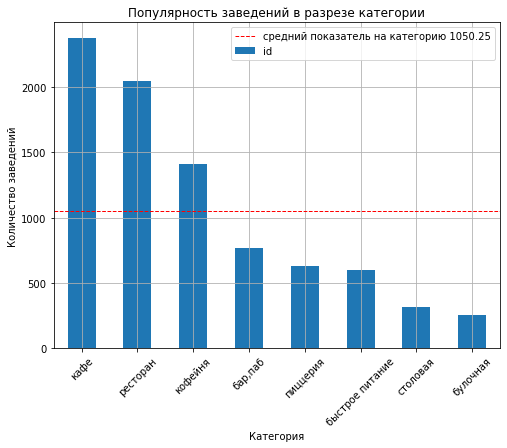

In [37]:
# Посмтром столбчатую диограмму для визуального анализа
category_count.plot(kind='bar',
                 figsize=(8,6),
                 rot=45,
                 xlabel='Категория',
                 ylabel='Количество заведений',
                 title = 'Популярность заведений в разрезе категории',
                 legend=True
                  )
# Построим линию среднего показателя
plt.axhline(category_count.mean(), 
            color='red',
            linestyle='--',
            linewidth=1, 
            label=f'средний показатель на категорию {round(category_count.mean(),4)}')

plt.legend()
plt.grid()

Наблюдаем тенденцию: чем ниже предполагаемый категорией уровень сервиса - тем меньше конкуренция в этом сегменте.
Данные можно разделить на 4 группы:

- Выше всего конкуренция в сегменте кафе и ресторанов - более 2000 заведений в каждой категории.
- Вторая по популярности категория заведений - кофейни - 1413 заведений. Данная категория - последняя, которая переваливает за средний показатель заведений в категории.
- Затем группа: бар/паб, пиццерии и фастфуд - от 600 до 760 заведений
- В самую непопулярную группу вошли столовые и булочные - меньше 315 заведений.


### 3.2 Исследуем рынок в разрезе районов Москвы

In [38]:
# Сгруппируем данные по районам и подсчитаем количество заведений
district_df = df.groupby('district')['id'].count().sort_values(ascending=True)

In [39]:
district_df.reset_index()

,district,id
0,северо-западный административный округ,409
1,юго-западный административный округ,709
2,юго-восточный административный округ,714
3,восточный административный округ,798
4,западный административный округ,850
5,северо-восточный административный округ,890
6,южный административный округ,892
7,северный административный округ,898
8,центральный административный округ,2242


Text(0, 0.5, 'Район')

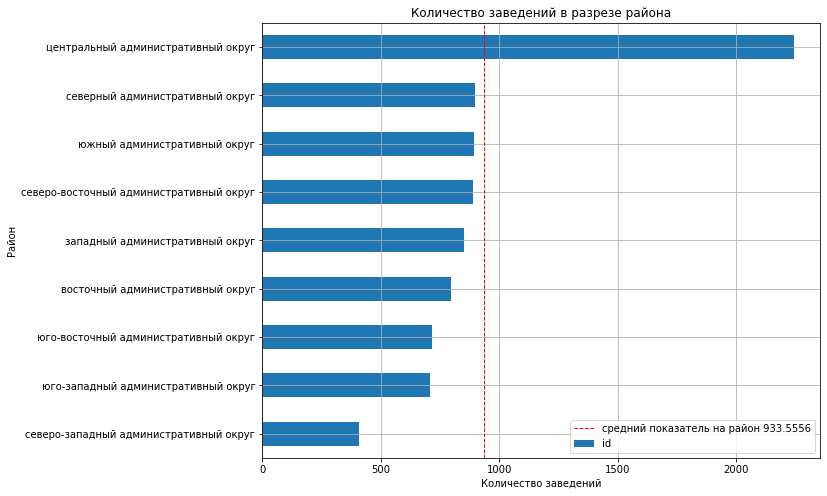

In [40]:
# Посмтром столбчатую диограмму для визуального анализа
district_df.plot(kind='barh',
                 figsize=(10,8),
                 rot=0,
                 xlabel='Количество заведений',
                 ylabel='Район',
                 title = 'Количество заведений в разрезе района',
                 legend=True
                  )
# Построим линию среднего показателя
plt.axvline(district_df.mean(),
            color='red',
            linestyle='--', 
            linewidth=1, 
            label=f'средний показатель на район {round(district_df.mean(),4)}')
plt.legend()
plt.grid()
plt.xlabel('Количество заведений')
plt.ylabel('Район')

In [41]:
# Рассчитаем долю заведений в разрезе района
percent_district_df = district_df/df.shape[0]*100

In [42]:
percent_district_df.reset_index().sort_values(by= 'id',ascending=False)

,district,id
8,центральный административный округ,26.684123
7,северный административный округ,10.687931
6,южный административный округ,10.616520
5,северо-восточный административный округ,10.592716
4,западный административный округ,10.116639
3,восточный административный округ,9.497739
2,юго-восточный административный округ,8.497977
1,юго-западный административный округ,8.438467
0,северо-западный административный округ,4.867889


- Чуть больше четверти заведений всей Москвы находится в ЦАО, что является самой большой долей относительно других районов.
- Процентный диапазон остальных районов составляет ~ от 5% до 10%
- Доля заведений в ЦАО - значительно сбивает средний показатель.

-----

Рассмотрим подробнее `центральный административный округ` в разрезе категорий заведений.

In [43]:
# Отфильтруем данные для определенного района
cao_df = df[df['district'] == 'центральный административный округ']

In [44]:
# Группируем по категориям и считаем количество
gr_cao_df = cao_df.groupby('category')['id'].count().sort_values(ascending=False)

In [45]:
# Собираем датафрейм с количеством и относительным распределением в проценитах
cao_table = pd.DataFrame({'Количество': gr_cao_df, 'Процент': round(gr_cao_df/cao_df.shape[0]*100,2) })

In [46]:
cao_table

,Количество,Процент
category,,
ресторан,670,29.88
кафе,464,20.70
кофейня,428,19.09
"бар,паб",364,16.24
пиццерия,113,5.04
быстрое питание,87,3.88
столовая,66,2.94
булочная,50,2.23


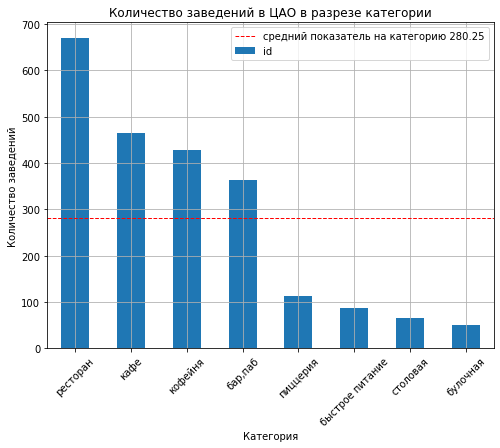

In [47]:
# Посмтром столбчатую диограмму для визуального анализа
gr_cao_df.plot(kind='bar',
                 figsize=(8,6),
                 rot=45,
                 xlabel='Категория',
                 ylabel='Количество заведений',
                 title = 'Количество заведений в ЦАО в разрезе категории',
                 legend=True
                  )
# Построим линию среднего показателя
plt.axhline(gr_cao_df.mean(), 
            color='red',
            linestyle='--',
            linewidth=1, 
            label=f'средний показатель на категорию {round(gr_cao_df.mean(),4)}')

plt.legend()
plt.grid()

Тенденции количества заведений в ЦАО схожи с общими по Москве:

- Рестораны - треть всех заведений ЦАО занимают лидирующую строчку с большим открывом.
- Булочные, столовые и фастфуд и пиццерии - в замыкающей группе и имеют сильно ниже среднего заведений в каждой категории.
- В центральном округе. в отличии от в целом по Москве, ко второй группе лидеров (кафе и кофейни) присоединяется сегмент `бар/паб`. Последний по поулярности сегмент с показателем выше среднего.

### 3.3 Исследование соотношения сетевых и несетевых заведений

In [48]:
# Группируем данные
chain_df = df.groupby('chain')['id'].count().reset_index()

In [49]:
chain_df

,chain,id
0,0,5199
1,1,3203


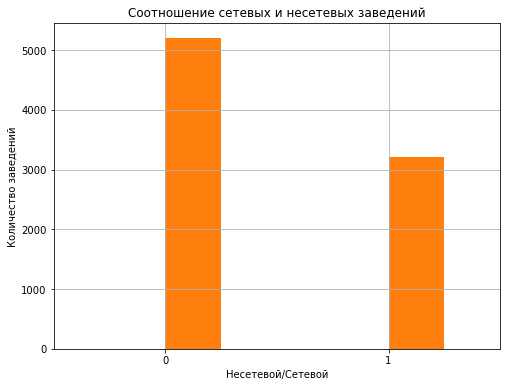

In [50]:
# Построим столбчатую диограмму
chain_df.plot(    kind='bar', 
                  figsize=(8,6),
                  title = 'Соотношение сетевых и несетевых заведений',
                  rot=0,
                  ylabel='Количество заведений',
                  xlabel='Несетевой/Сетевой',
                  legend=False)
plt.grid()

In [51]:
# Подсчитаем доли заведений
chain_df['id']/df.shape[0]*100

0    61.878124
1    38.121876
Name: id, dtype: float64

В общей картине, несетевые заведения преобладают над сетевыми в соотоношении ~ 62% / 38%

Посмотрим какие категории заведений чаще бывают сетевыми:


In [54]:
# Подсчитаем долю сетевых заведений в каждой категории
chain_cat_percent = round(df.groupby('category')['chain'].sum() / df.groupby('category')['id'].count(),2)

In [55]:
# Отсортируем
chain_cat_percent = chain_cat_percent.sort_values(ascending=False)

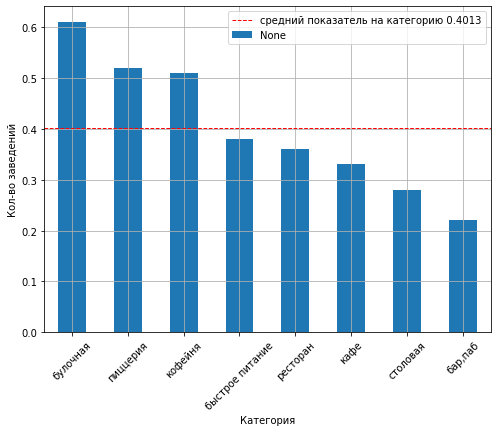

In [56]:
# Выводим столбчатую диограмму
chain_cat_percent.plot.bar(figsize=(8,6),
                      rot=45,
                      ylabel='Кол-во заведений',
                      xlabel='Категория'
                      )
# Построим линию среднего показателя
plt.axhline(chain_cat_percent.mean(), 
            color='red',
            linestyle='--',
            linewidth=1, 
            label=f'средний показатель на категорию {round(chain_cat_percent.mean(),4)}')
plt.legend()
plt.grid()

In [57]:
chain_cat_percent.reset_index()

,category,0
0,булочная,0.61
1,пиццерия,0.52
2,кофейня,0.51
3,быстрое питание,0.38
4,ресторан,0.36
5,кафе,0.33
6,столовая,0.28
7,"бар,паб",0.22


</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Blue'>Выше провел фильтрацию и отредактировал визуализацию. Ниже исправил выводы.

- Больше всего сетевых заведений наблюдается в категориях `булочная`, `пиццерия` и `кофейня`. Больше половины заведений этих категорий являются сетевыми.
- `бар,паб` - категория с самым низким процентом сетевых заведений - лишь 22№
- Показатели остальных категорий в районе трети (28-38%)

### 3.4 Исследование количества посадочных мест в заведениях
    

Посмтриом гистограмму и диограмму размаха для серии `seats` и исследуем стандартные показатели.
Затем изучим наиболее типичное количество посадочных мест для каждой категории.

In [58]:
# Исследуем стандартные показатели
df['seats'].describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

- Среднее значение выше медианы. Скорее всего гистограмма будет правоасимметричная.
- Данные явно имеют аномальные значения - на это указывает максимальное значение и показатели процентилей.

In [59]:
# Исследуем моду
df['seats'].mode()

0    40.0
dtype: float64

Text(0, 0.5, 'Частота')

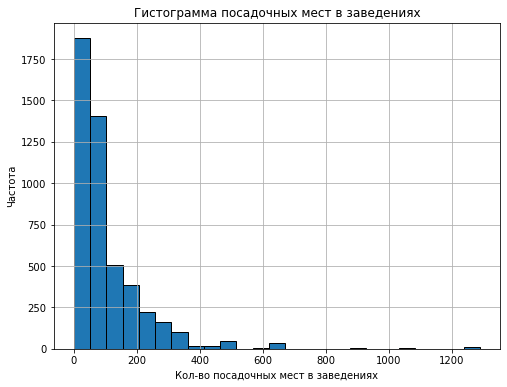

In [60]:
# Постриом гистограмму для серии `seats`

df['seats'].plot(kind='hist',
                 figsize=(8,6),
                 edgecolor='black',
                 bins=25,
                 title='Гистограмма посадочных мест в заведениях',
                 xlabel='Кол-во посадочных мест в заведениях',
                 ylabel='Частота'     )
plt.grid()
# Добавляю названия осей
plt.xlabel('Кол-во посадочных мест в заведениях')
plt.ylabel('Частота')

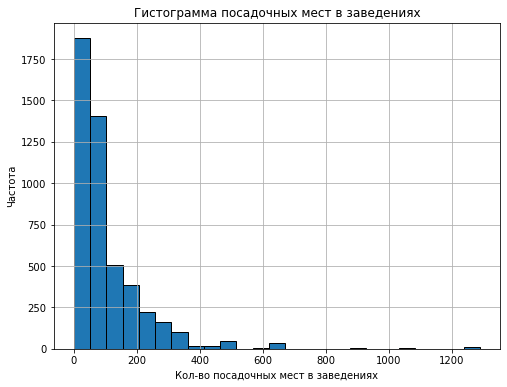

In [61]:
# Комментарий ревьюера 2

df['seats'].plot(kind='hist',
                 figsize=(8,6),
                 edgecolor='black',
                 bins=25)
plt.grid()              
plt.title('Гистограмма посадочных мест в заведениях')
plt.xlabel('Кол-во посадочных мест в заведениях')
plt.ylabel('Частота') 
plt.show()

- Наблюдаем гистограмму положительной скошенности.
- Значительно большое количество значений находится в диапазоне от 0 до 100 посадочных мест

Text(0.5, 0, 'Количество посадочных мест')

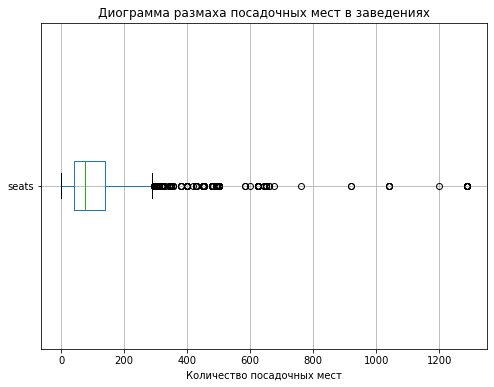

In [62]:
# Построим диограмму размаха для серии `seats`
df.boxplot(column='seats', vert=False, figsize=(8,6))
plt.title('Диограмма размаха посадочных мест в заведениях')
plt.xlabel('Количество посадочных мест')    # Подписал ось Х


- Наблюдаем большой хвост с правой стороны. 
- Некоторые значения из выбросов не выглядат правдиво.
- Стоит проанализировать большие значения. Возможно придется отфильтровать данные.

In [63]:
df['seats'].value_counts()

40.0     253
100.0    213
60.0     175
50.0     168
80.0     160
        ... 
161.0      1
430.0      1
131.0      1
760.0      1
305.0      1
Name: seats, Length: 229, dtype: int64

Найдем типичное количество посадочных мест для каждой категории

In [66]:
# Cгруппируем данные по категориям и найдем медиану
category_seats_df = df.groupby('category')['seats'].median().sort_values(ascending=False).reset_index()

In [67]:
category_seats_df

,category,seats
0,ресторан,86.0
1,"бар,паб",82.0
2,кофейня,80.0
3,столовая,75.5
4,быстрое питание,65.0
5,кафе,60.0
6,пиццерия,55.0
7,булочная,50.0


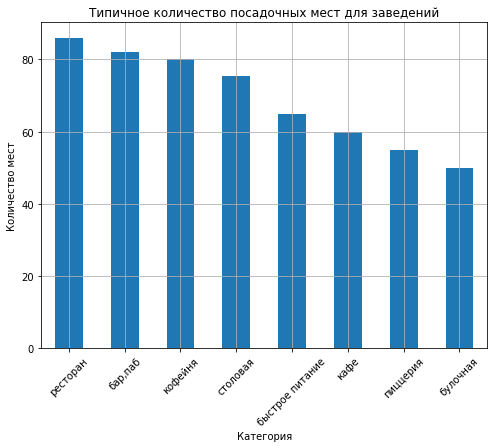

In [68]:
# Визуализируем полученные данные
category_seats_df.plot(kind='bar',
                       x='category',
                       y='seats',
                       rot=45,
                       figsize=(8,6),
                       title='Типичное количество посадочных мест для заведений',
                       ylabel='Количество мест',
                       xlabel='Категория',
                       legend=False)
plt.grid()                    

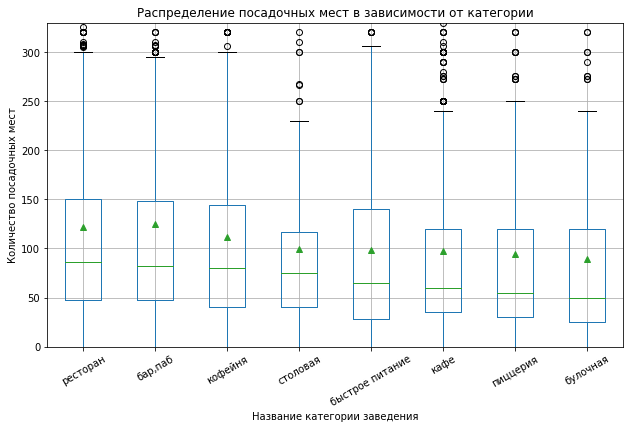

In [102]:
# Визуализируем распределение посадочных мест в зависимости от категории
tmp = df.copy()  # Создаем копию датасета, что бы не работать с исходным

# Вычисление медианы для каждой категории
medians = tmp.groupby('category')['seats'].median().sort_values(ascending=False)

# Сортировка по медиане
sorted_categories = medians.index
tmp['category'] = pd.Categorical(tmp['category'], categories=sorted_categories, ordered=True)

tmp.boxplot(column='seats', 
             by='category', 
             grid=True,       # Выводим сетку на диаграмму
             showmeans=True,  # Зеленый треугольники показывают среднее значение  
             figsize=(10, 6))

# Добавление заголовка и меток осей
plt.title('Распределение посадочных мест в зависимости от категории')
plt.xlabel('Название категории заведения')
plt.ylabel('Количество посадочных мест')

plt.xticks(rotation = 30)  #  Поворачиваем метки на оси Х, что бы они не сливались 
plt.ylim(0,330)            # Ограничиваем вывод для того, чтобы боксплоты были крупными, 
                           # если убрать, то будут видны все выбросы
plt.suptitle('')           # Удаление метки "seats" с оси X
plt.show()                 # Отображение диаграммы

Подведем итоги: 

- Приблизительно для 43% заведений данные о количестве посадочных мест отсутсвуют.
- Данные о количестве посадочных мест имеют положительную скошенность в гистограмме, а диограмма размаха имеет большой правый хвост.
- Выбросы оставили без изменений. Так как часть заведений может распологаться на территории спортивно-концертных комплексов и фуд-кортов.
- Типичные количества посадочных мест в разерезе категорий разнятся. 


### 3.5 Исследование рейтингов заведений

Изучим данные о рейтингах заведений в целом и в разрезе категорий заведений.

In [70]:
# Посмотрим уникальные значения
df['rating'].unique()

array([5. , 4.5, 4.6, 4.4, 4.7, 4.8, 4.3, 4.9, 4.2, 4.1, 4. , 3.8, 3.9,
       3.7, 3.6, 2.8, 2.7, 3.1, 1.5, 2. , 1.4, 3.3, 3.5, 3.2, 2.9, 3. ,
       3.4, 2.3, 2.2, 2.5, 2.6, 1.7, 1. , 1.1, 2.4, 1.3, 1.2, 2.1, 1.8,
       1.9, 1.6])

Text(0, 0.5, 'Частота')

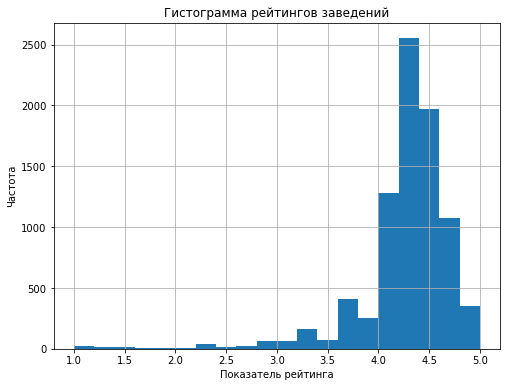

In [71]:
# Построим гистограмму
df['rating'].plot.hist(figsize=(8,6),
                       bins=20,
                      #xlabel='Rating' 
                       title='Гистограмма рейтингов заведений',
                       xlabel='Показатель рейтинга',
                       ylabel='Частота')
plt.grid()
plt.xlabel('Показатель рейтинга') # Добавляем название осей
plt.ylabel('Частота')

In [72]:
# Исследуем стандартные показатели
df['rating'].describe()

count    8402.000000
mean        4.230017
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

- Наблюдаем достаточно ровную гистограмму. Небольшой левый хвост, что говорит о том, что предельно низкие оценки заведениям ставят очень редко. 
- Медиана практически совпадает со средним значением, что говорит об отсутсвии большого количества выбросов и аномальных значений.

-----

Рассотрим средние показатели рейтингов в разрезе категорий:

In [73]:
# Сгруппируем данные с помощью сводной таблицы
pivot_rating = pd.pivot_table(df, index='category', values='rating',aggfunc='mean').sort_values(by='rating',ascending=False)

In [74]:
pivot_rating

,rating
category,
"бар,паб",4.387696
пиццерия,4.301264
ресторан,4.290402
кофейня,4.277282
булочная,4.268359
столовая,4.211429
кафе,4.124285
быстрое питание,4.050249


In [75]:
# Исследуем вариации средних рейтингов по категориям
category_rating = df.groupby('category')['rating'].describe().sort_values(by='mean',ascending=False)

In [76]:
category_rating

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"бар,паб",764.0,4.387696,0.380392,1.1,4.3,4.4,4.6,5.0
пиццерия,633.0,4.301264,0.336162,1.0,4.2,4.3,4.4,5.0
ресторан,2042.0,4.290402,0.413143,1.0,4.2,4.3,4.5,5.0
кофейня,1413.0,4.277282,0.372250,1.4,4.1,4.3,4.4,5.0
булочная,256.0,4.268359,0.386303,1.3,4.2,4.3,4.4,5.0
столовая,315.0,4.211429,0.454205,1.0,4.1,4.3,4.4,5.0
кафе,2376.0,4.124285,0.566001,1.0,4.0,4.2,4.4,5.0
быстрое питание,603.0,4.050249,0.560949,1.1,3.9,4.2,4.3,5.0


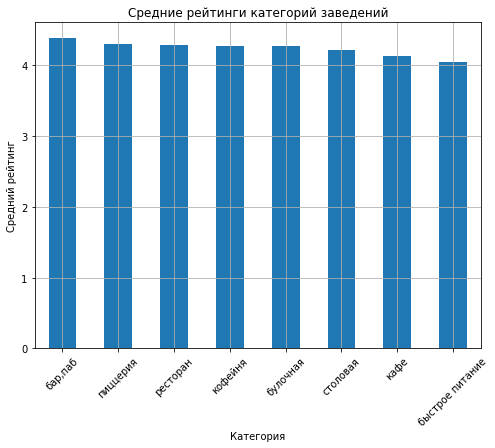

In [77]:
# Визуализируем результат
pivot_rating.plot(kind='bar',
                  figsize=(8,6),
                  title='Средние рейтинги категорий заведений',
                  xlabel='Категория',
                  ylabel='Средний рейтинг',
                  rot=45,
                  legend=False
                  )

plt.grid()

- Показатели средний значений рейтинга по категориям достаточно равные. Размах между максимальным и минимальным значением состовляет лишь 0.3 и все близки к средней оценке вне категорий. 
- Имея пятибальную шкалу - средние оценки для каждой категории хорошие - выше 4. Что говорит о высокой лояльности пользователей сервиса.
- Категрия `бар,паб` имеет наивысшую среднюю оценку - `4,38`, а вот фастфуд - самую низкую - `4.05.
- `Кафе` будучи самой популярной категорией в Москве - имеет второй худший средний рейтинг  - `4,12`
 

### 3.5 Изучение зависимости рейтинга заведений от других показателей

Построим и визуализируем матрицу корреляции рейтинга с другими показателями. 

In [78]:
# Построим матрицу корреляции
corr_matrix = df[['category','district','chain','seats','is_24_7','price','middle_avg_bill','rating']].phik_matrix()

interval columns not set, guessing: ['chain', 'seats', 'is_24_7', 'middle_avg_bill', 'rating']


In [103]:

df['price'].value_counts()

средние          2117
выше среднего     564
высокие           478
низкие            156
Name: price, dtype: int64

In [104]:
corr_matrix.loc[corr_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

,rating
price,0.220295
middle_avg_bill,0.211868
district,0.200761
category,0.189716
is_24_7,0.150365
chain,0.107833
seats,0.000000


Text(0.5, 33.0, 'Рейтинг заведения')

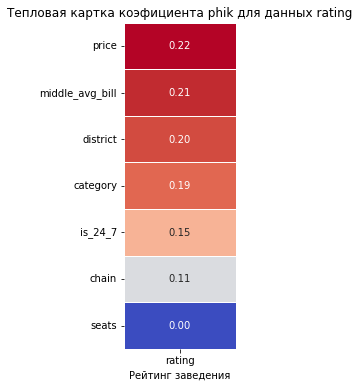

In [105]:
# Построим тепловую карту
plt.figure(figsize=(2, 6))

data_heatmap = corr_matrix.loc[corr_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

sns.heatmap(data_heatmap,
             annot=True,
             fmt='.2f',
             cmap='coolwarm',
             linewidths=0.5,
             cbar=False)

plt.title('Тепловая картка коэфициента phik для данных rating')
plt.xlabel('Рейтинг заведения')

- Самую сильную корреляцию значений `rating` наблюдаем со значениями `price` -0,22
- Так же стоит учесть, что в данных `price`  около 60% пропусков 

-------

Исследуем зависимость рейтинга заведения от ценового признака:

In [82]:
# Сгруппируем данные
price_grouped_df = df.groupby('price')['rating'].mean().sort_values(ascending=False)

Text(0.5, 1.0, 'Исследование зависимости рейтинга от ценовой категории')

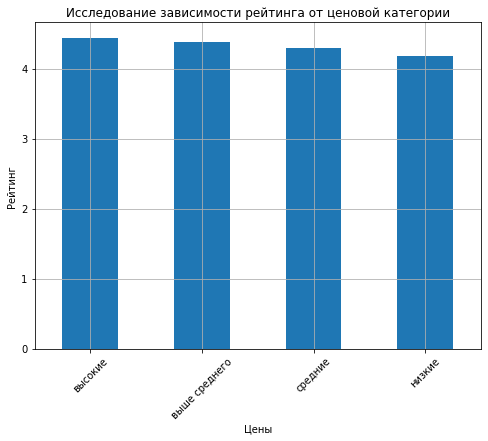

In [83]:
# Построим столбчатую диограмму
price_grouped_df.plot.bar(figsize=(8,6),
                          rot=45,
                          xlabel='Цены',
                          ylabel='Рейтинг')
plt.grid()
plt.title('Исследование зависимости рейтинга от ценовой категории') # Добавляем название графика

In [84]:
price_grouped_df.reset_index()

,price,rating
0,высокие,4.436611
1,выше среднего,4.386348
2,средние,4.297874
3,низкие,4.173077


Наблюдается тенденция - чем в заведении выше цены - тем выше средняя оценка этих заведений. Однако зависимость не сильная - размах между максимальным и минимальным показателем рейтинга приблизительно 0.26.

### 3.7 Анализ популярных сетевых заведений

Вычислим 15 самых популярных сетей (под популярностью понимается количество заведений этой сети в регионе). 
Для этого сгруппируем данные по названию заведения и расчитаем количество заведений, средний рейтинг, а так же выведем категорию заведения.

In [85]:
# Отфильтруем даннны - оставим только сетевые заведения
top_chain_df = df[df['chain']==1]

In [86]:
# Cгруппируем данные по столбцам 'name' и 'category'
top_15_df = top_chain_df.groupby(['name','category']).agg({'name':'count',
                              'rating':'mean'})

In [87]:
# Переименуем столбец для сортировки
top_15_df.rename(columns={'name':'count'}, inplace=True)

In [88]:
# Отсортируем данные
top_15_df = top_15_df.sort_values(by='count', ascending=False).head(15)

In [89]:
top_15_df

,,count,rating
name,category,,
шоколадница,кофейня,119,4.178151
домино'с пицца,пиццерия,76,4.169737
додо пицца,пиццерия,74,4.286486
one price coffee,кофейня,71,4.064789
яндекс лавка,ресторан,69,3.872464
cofix,кофейня,65,4.075385
prime,ресторан,49,4.114286
кофепорт,кофейня,42,4.147619
кулинарная лавка братьев караваевых,кафе,39,4.394872


Text(0, 0.5, 'Название и категория')

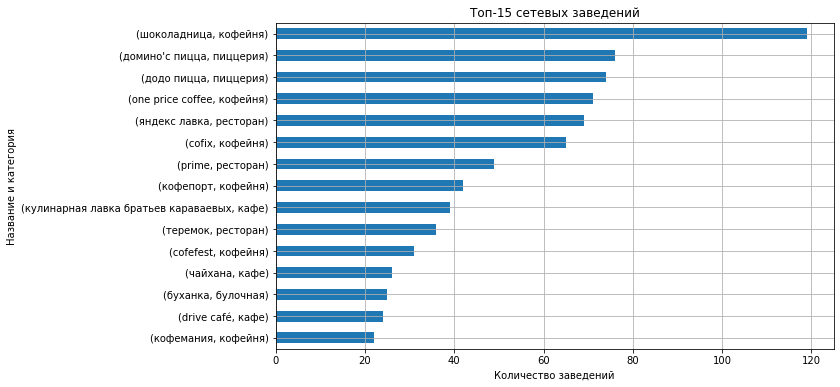

In [90]:
# Построим диограмму 
top_15_df.sort_values(by='count').plot(kind='barh',
               figsize=(10,6),
               title='Топ-15 сетевых заведений',               
               y='count',
               
               legend=False                        
               )

plt.grid()
plt.xlabel('Количество заведений')
plt.ylabel('Название и категория')

- В топ-15 сетевых заведений не вошли такие категории как `столовая`,`бар,паб`,`быстрое питание`.
- Сеть кофеен "Шоколадница" - лидер с большим отрывом среди сетевых заведений - 119 кофеен.
- На втором и третьем месте топ-15 - пиццерии Домино'c пицца и Додо пицца - 76 и 74 заведения соответсвенно. Неожиданно, с учетом низкой популярности категории `пиццерия` в целом по Москве. Что говорит нам о распределении этой ниши между двумя крупными сетевыми пиццериями.
- У некоторых сетевых заведений встречаем среднюю оценку меньше 4.

### 3.8 Изучение вариации среднего чека в зависимости от района.

</font><font color='Blue'><b>Комментарий студента</b></font><br>
</font><font color='Blue'>Ниже всё исправил!

In [91]:
# Изучим стандартные показатели столбца 'middle_avg_bill'
df['middle_avg_bill'].describe()

count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

<AxesSubplot:title={'center':'Распределение значений среднего чека'}, ylabel='Frequency'>

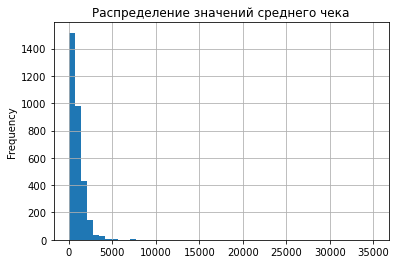

In [92]:
# Построим гистограмму по столбцу 'middle_avg_bill'
df['middle_avg_bill'].plot(kind='hist',
                           xlabel='Средний чек',
                           ylabel='Частота',
                           grid=True,
                           title='Распределение значений среднего чека',
                           bins=50)

Text(0.5, 0, 'Средний чек')

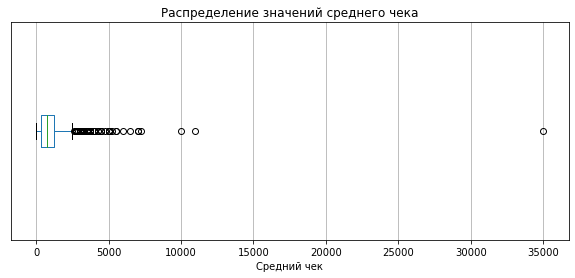

In [93]:
# Построим диограмму размаха по столбцу 'middle_avg_bill'
df.boxplot(column='middle_avg_bill',vert=False, figsize=(10,4))

ax = plt.gca()
ax.axes.yaxis.set_ticks([])
plt.title('Распределение значений среднего чека') 
plt.xlabel('Средний чек') # 

- Наблюдаем положительно скошенную гистограмму с небольшим хвостом.
- Диограмма размаха показывает много выбросов и одно похожее на аномальное, но имеет место быть.

In [94]:
# Построим матрицу корреляции для данных параметров
corr_df = df[['district','middle_avg_bill']].phik_matrix()

interval columns not set, guessing: ['middle_avg_bill']


In [95]:
corr_df

,district,middle_avg_bill
district,1.000000,0.056558
middle_avg_bill,0.056558,1.000000


Наблюдаем достстаончо высокий уровень зависимости.

In [96]:
# Сгруппируем данные
dist_bill_df = df.groupby('district')['middle_avg_bill'].describe(percentiles=[0.5]).sort_values(by='mean',ascending=False)

In [97]:
dist_bill_df

,count,mean,std,min,50%,max
district,,,,,,
центральный административный округ,1060.0,1191.057547,920.014707,0.0,1000.0,7250.0
западный административный округ,306.0,1053.225490,779.008536,50.0,1000.0,5250.0
северный административный округ,322.0,927.959627,912.609221,130.0,650.0,11000.0
южный административный округ,314.0,834.398089,2008.640596,100.0,500.0,35000.0
северо-западный административный округ,157.0,822.222930,595.055218,120.0,700.0,2900.0
восточный административный округ,260.0,820.626923,850.903310,50.0,575.0,10000.0
юго-западный административный округ,235.0,792.561702,559.173122,100.0,600.0,2750.0
северо-восточный административный округ,301.0,716.611296,591.232153,50.0,500.0,4500.0
юго-восточный административный округ,194.0,654.097938,566.825663,30.0,450.0,3750.0


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>Более полный анализ центральной тенденции среднего чека заведений по административным округам был бы при выводе и медианы, и среднего значения среднего чека, примерно вот так:</font>
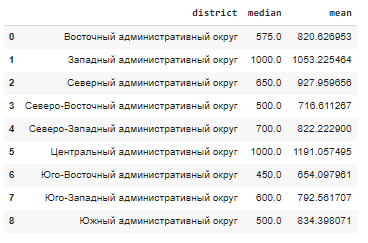

In [98]:
# Переименнуем для удобства столбец
dist_bill_df.rename(columns={'50%':'median'}, inplace=True)

Text(0.5, 0, 'среднее/медиана')

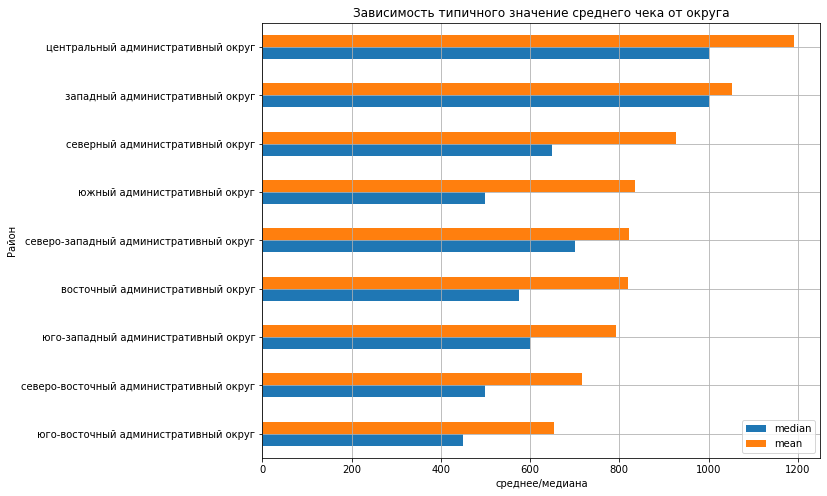

In [99]:
# Построим столбчатую диограмму со средним значением и медианой среднего чека в разрезе района Москвы
dist_bill_df.sort_values(by='mean',ascending=True).plot.barh(y=['median','mean'], 
                       
                  figsize=(10,8)
                  )
plt.grid()
plt.title('Зависимость типичного значение среднего чека от округа')
plt.ylabel('Район')
plt.xlabel('среднее/медиана')

Наблюдаем сильную зависимость вариации среднего чека в зависимости от района и удаления от центра. Южные округа имеют самые низкие средние чеки.


### 3.9 Результаты

- Выявлены тенденции на популярные категории заведений.
- Наблюдаем зависимость округа на количество заведений и на ценовой показатель.
- Изучили типичное количество посадочных мест для заведений.
- Изучили количество сетевых и несетевых заведений и популярные категории среди сетевого сегмета. Изучили самые популярные сети заведений
- Изучили средние рейтинги завеведений.

## 4 Итоговый вывод и рекомендации.

Что сделали:

- Познакпомились со всеми данными, все описаные столбцы и значения указаны в корректном стиле и соответствуют описанию
- Проведена предобрабокта данных: поработали с пропусками - часть заменили, часть оставили как есть. Наличие дубликатов не обнаружено. Для предобработки и дальнейшего исследования добавили два новых столбца `is_seats` и `is_24_7`
- Провели исследовательский анализ данных и ответили на все вопросы.

Выводы и ответы на вопросы:

- Самая популярная с большим отрывом категория общественного питания в Москве - `Кафе`. Далее идут `рестораны` и `кофейни`. В целом есть зависимость между популяностью заведения и его потенциальным уровнем сервиса, так как фастфуд, булочные и столовые имеют самое маленькое представительство в нашей выборке


- Центральный административный округ является районом с самом большим количеством заведений в Москве. В нем находится четверть всех заведений города. Остальные районы расположились в плавное соотношение от 4% до 10%. Внутри центрального района так самая популярная категория - `Рестораны`,в отличии от в целом по Москве. Во второй группе так же располагаются `кофейня` и `кафе` В центре `бары` пользуются большей популярностью чем в целом по Москве и имеют показатель популярности выше среднего.


- В Москве несетевые заведения преобладают над сетевыми (~62/38%). Самая большая доля сетевых заведений в категориях `булочная`,`пиццерия` и `кофейня` соответственно. Категория `бар,паб` имеет самую маленькую долю - 22%, остальные категории c интервалом 28-38%

- В данных о количестве посадочным мест много пропусков. Из тех данных, что мы имеем можно сделать вывод, что типичное количество посадочных мест варируется от 55 до 90 в зависимости от категории заведения.


- Показатели рейтингов заведений очень ровные. Усредненные показатели в зависимости от категории досаточно близки - все выше 4 и разница между максимальным и минимальным показателем лишь 0.3.


- Самую сильную корреляцию (0,22) рейтинг имеет с показателем категории цен в заведении, при том, что данные имели около 60% пропусков. После детального изучения наблюдали зависимость: чем выше ценовая категория - тем выше оценка. Однако зависимость совсем небольшая и размах между минимальными и максимальными показателями рейтинга не превышает 0.3


- В Топ-15 сетевых заведений явно выделяются одна франшиза - `кофейня Шоколадница`(119 заведений). Далее неожиданно идут пиццерии  `Додо Пицца` и `Доминос' пицца`, что имеют более 70-ти заведений. В топ-15 сетевых заведений не вошли такие категории как `столовая`,`бар,паб`,`быстрое питание`.


- Наблидаем зависимость среднего чека в заведении в зависимости от района: сюрпризов нет - в ЦАО самый высокий показатель среднего чека, но в отличии от метрики "Количество заведений в разрезе района" - тут лидерство не единоличное и другие тенденции. ЗАО занимет вторую строчку с разницей меньше 200р. Так же наблюдаем, что все восточнче районы имеют низший средний чек.



В целом, самым типичным заведением Москвы явдяется несетевое `кафе` или `ресторан` в ЦАО с высокими ценами и количеством посадочных мест около 90.

Так же инвесторам стоит обратить внимание на ЗАО, так как уровень конкуренции в отличии от ЦАО в три раза меньше, но при этом средние показатели среднего чека отличаются не сильно.